# Imports

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wasserstein_distance
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

# Import data

In [56]:
def get_score_filename(origin,dimension,simmetry,score):
    rigins = {'-r':'RTGA','-g':'GAN'}
    if os.getcwd().split('\\')[2] == 'lucas':
        score_filename = 'E:/Lucas GAN/Dados/4- Mechanical_scores/%s/%sD/%s/%s.csv' %(origins[origin],dimension,simmetry,score)
    else:
        score_filename = 'D:/Lucas GAN/Dados/4- Mechanical_scores/%s/%sD/%s/%s.csv' %(origins[origin],dimension,simmetry,score)

    return score_filename
origins = {'-r':'RTGA','-g':'GAN'}


## Best geometries

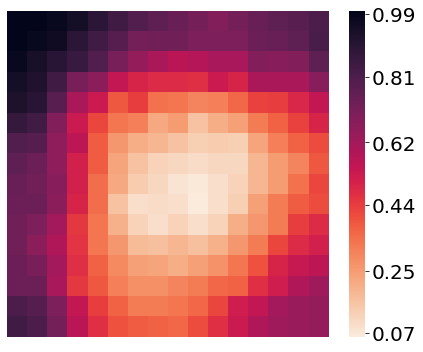

In [84]:
def show(data, figsize, fontsize,showticks, showbar, cmap,fname=None,extension='png',save=False):
    fig = plt.figure(frameon=False,figsize=figsize)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    g = sns.heatmap(data,xticklabels=showticks, yticklabels=showticks, cbar=showbar, cmap=cmap, vmin= data.max(),vmax = data.min(),linewidths=0,annot=False)
    cbar = g.collections[0].colorbar
    cax = plt.gcf().axes[-1]
    cax.tick_params(labelsize=20)
    ticks = [np.round(data.min()+(data.max()-data.min())*float(i)/5.0,2) for i in range(6)]
    ticks[0]+=0.01
    ticks[-1]-=0.01
    cbar.set_ticks(ticks)
    if save:
        plt.savefig(fname, format=extension, dpi = 1200)

dimension = '2'
origin = '-r'
score = 'hs'
simmetry = 'p4'
fontsize = 25
figsize = (7.2,6)
extension = 'png'
freq_filename = 'C:/Users/lucas/OneDrive/Documentos/GitHub/INT/Manufatura Aditiva/Simulacao-GAN/Pipeline/3- Machine_learning/Analyse/data/%sD/freqs/%s/%s.%s'%(dimension,origins[origin],score,extension)

score_filename = get_score_filename(origin, dimension, simmetry, score)
data = np.loadtxt(score_filename,delimiter=',')
top = 100
order = np.argsort(data[:,-1])[-top:]
top_data = data[order]
top_geoms = top_data[:,1:-1]
idxs_top = top_data[:,0]

freq_geom = []
for i in range(len(top_geoms[0])):
    freq_geom.append(top_geoms[:,i].sum())
freq_geom = np.array(freq_geom)/top
freq_geom = freq_geom.reshape((int(len(freq_geom)**0.5),int(len(freq_geom)**0.5)))
show(freq_geom,figsize,fontsize, False,True,'rocket_r',freq_filename,extension,save=True)

# Visualize best RTGA geometries

> isotropy idx: 372. score: 0.999638


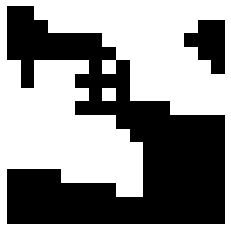

In [92]:
origin = '-r'
scores = ['isotropy']
extension = 'png'

for score in scores:
    score_filename = get_score_filename(origin, dimension, simmetry, score)
    data = np.loadtxt(score_filename,delimiter=',')
    top = int(data.shape[0]*0.25)
    # top = 50
    order = np.argsort(data[:,-1])[-top:]
    top_data = data[order]
    best_geom_filename = 'C:/Users/lucas/OneDrive/Documentos/GitHub/INT/Manufatura Aditiva/Simulacao-GAN/Pipeline/3- Machine_learning/Analyse/data/%sD/best_geom/%s/%s.%s'%(dimension,origins[origin],score,extension)

    for i in range(1):
        geom = top_data[-i-1,1:-1]
        print("> %s idx: %d. score: %f"%(score,idxs_top[-i-1]+1,top_data[-i-1,-1]))
        geom = geom.reshape((int(len(geom)**0.5),int(len(geom)**0.5)))
        plt.imshow(geom,cmap='Greys')
        plt.axis('off')
        plt.savefig(best_geom_filename,format=extension, dpi = 1200, bbox_inches='tight')
        plt.show()

# Histograms

## Visualize RTGA scores

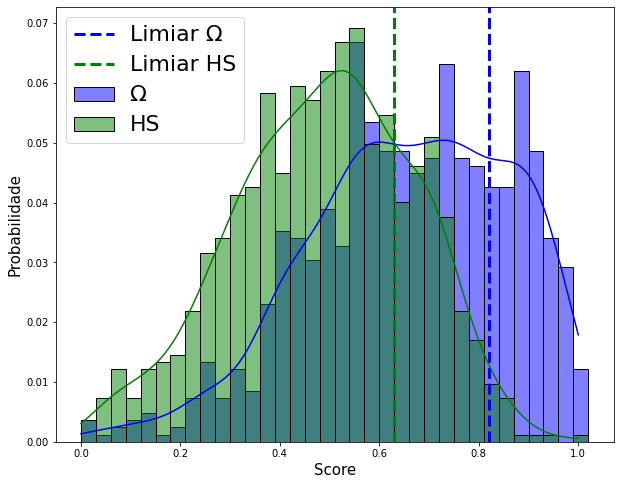

In [42]:
score_r = 'E:/Lucas GAN/Dados/4- Mechanical_scores/RTGA/%sD/%s/isotropy.csv' %(dimension,simmetry)
data_iso = np.loadtxt(score_r,delimiter=',')   
score_r = 'E:/Lucas GAN/Dados/4- Mechanical_scores/RTGA/%sD/%s/hs.csv' %(dimension,simmetry)
data_hs = np.loadtxt(score_r,delimiter=',')   

hist_filename = 'C:/Users/lucas/OneDrive/Documentos/GitHub/INT/Manufatura Aditiva/Simulacao-GAN/Pipeline/3- Machine_learning/Analyse/data/%sD/hists/hist_hs_iso.png'%(dimension)


datas = [data_iso,data_hs]
colors = ['b','b','g','g']
labels = ['Ω','Limiar Ω','HS','Limiar HS']
fig = plt.figure(frameon=False,figsize=(10,8))
i = 0
cutoffs = [0.82,0.63]

for data_ in datas:
    score = data_[:,-1]
    scaler = MinMaxScaler()
    score = scaler.fit_transform(score.reshape((score.shape[0],1))).ravel()
    plt.xlabel("Score",size=15)
    plt.ylabel("Probabilidade",size=15)
    g = sns.histplot(score,kde=True,stat='probability',legend=True,label=labels[2*i],binwidth=0.03,color=colors[2*i])
    plt.axvline(cutoffs[i], 0,score.max(), color=colors[2*i+1], ls='--',label=labels[2*i+1],linewidth=3)
    i += 1

plt.legend(prop={'size':20})
plt.setp(g.get_legend().get_texts(), fontsize='22')
plt.savefig(hist_filename)

## Comparing RTGA x GAN scores

C:\Users\lucas\Anaconda3\envs\deeplearn37\lib\site-packages\ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()
C:\Users\lucas\Anaconda3\envs\deeplearn37\lib\site-packages\ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\lucas\Anaconda3\envs\deeplearn37\lib\site-packages\ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()
C:\Users\lucas\Anaconda3\envs\deeplearn37\lib\site-packages\ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator


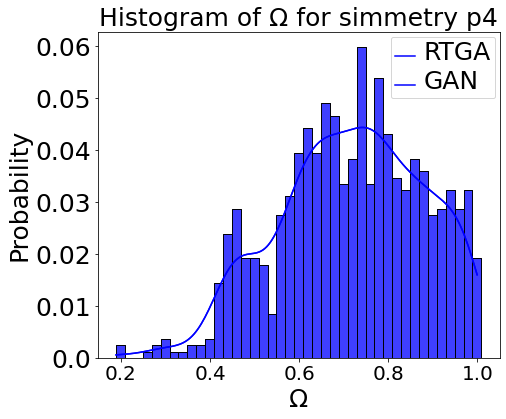

Wasserstein distance: 0.0000


In [34]:
def hist(data,data_g,x_label,fname,fontsize,figsize):
    datas = [data,data_g]
    labels = ['RTGA','GAN']
    colors = ['b','r']
    fig = plt.figure(frameon=False,figsize=figsize)
    for data_ in datas:
        score = data_[:,-1]
        # scaler = MinMaxScaler()
        # score = scaler.fit_transform(score.reshape((score.shape[0],1))).ravel()
        plt.title("Histogram of %s for simmetry %s"%(x_label,simmetry),fontsize=fontsize)
        plt.xlabel(x_label,fontsize=fontsize)
        plt.ylabel("Probability",fontsize=fontsize)
        # plt.axvline(np.mean(score), 0,score.max(), color='g', ls='--')
        # plt.legend()
        g = sns.histplot(score,kde=True,stat='probability',binwidth=0.02,legend=True,color=colors[datas.index(data_)])
        g.set_xticklabels([0.0,0.2,0.4,0.6,0.8,1.0], size = 20)
        g.set_yticklabels(g.get_yticks(), size = fontsize)

    plt.legend(labels=labels)
    plt.setp(g.get_legend().get_texts(), fontsize=fontsize)
    plt.savefig(fname, format='svg', dpi=1200, bbox_inches='tight')
    plt.show()
    print("Wasserstein distance: %.4f"%(wasserstein_distance(data[:,-1],data_g[:,-1])))

dimension = '2'
origin = '-r'
score = 'isotropy'
simmetry = 'p4'
fontsize = 25
figsize = (7.2,6)

x_labels = {'isotropy':'Ω','hs':'HS'}

hist(data,data,x_labels[score],'hist_%s.svg'%score,fontsize,figsize)